# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]

## Learning Outcomes

* Design and build a simulation environment that models sensor inputs, actuator effects, and performance measurement.
* Apply core AI concepts by implementing the agent function for a simple and model-based reflex agents that respond to environmental percepts.
* Practice how the environment and the agent function interact.
* Analyze agent performance through controlled experiments across different environment configurations.
* Graduate Students: Develop strategies for handling uncertainty and imperfect information in autonomous agent systems.

## Instructions

Total Points: Undergrads 98 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

### AI Use

Here are some guidelines that will make it easier for you:

* __Don't:__ Rely on AI auto completion. You will waste a lot of time trying to figure out how the suggested code relates to what we do in class. Turn off AI code completion (e.g., Copilot) in your IDE.
* __Don't:__ Do not submit code/text that you do not understand or have not checked to make sure that it is complete and correct.
* __Do:__ Use AI for debugging and letting it explain code and concepts from class.

### Using Visual Studio Code

If you use VS code then you can use `Export` (click on `...` in the menu bar) to save your notebook as a HTML file. Note that you have to run all blocks before so the HTML file contains your output.

### Using Google Colab

In Colab you need to save the notebook on GoogleDrive to work with it. For this you need to mount your google dive and change to the correct directory by uncommenting the following lines and running the code block.

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/')

Mounted at /content/drive


Once you are done with the assignment and have run all code blocks using `Runtime/Run all`, you can convert the file on your GoogleDrive into HTML be uncommenting the following line and running the block.

In [2]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/robot_vacuum.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/robot_vacuum.ipynb to html
[NbConvertApp] Writing 310556 bytes to /content/drive/MyDrive/Colab Notebooks/robot_vacuum.html


You may have to fix the file location or the file name to match how it looks on your GoogleDrive. You can navigate in Colab to your GoogleDrive using the little folder symbol in the navigation bar to the left.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [1]:
# make sure numpy is installed
%pip install -q numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [3]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'suck'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a different performance measure than the one specified in the PEAS description! Since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room. Your implementation needs to implement the **correct performance measure.** The energy budget of the agent is specified as `max_steps`.

In [4]:
def simple_environment(agent_function, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent_function(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [5]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: east
step 1 - action: suck
step 2 - action: suck
step 3 - action: east
step 4 - action: east
step 5 - action: east
step 6 - action: north
step 7 - action: east
step 8 - action: north
step 9 - action: suck
step 10 - action: west
step 11 - action: east
step 12 - action: west
step 13 - action: east
step 14 - action: suck
step 15 - action: east
step 16 - action: east
step 17 - action: east
step 18 - action: suck
step 19 - action: north


5

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt

def display_environment(env, agent_pos):
    """Hiển thị môi trường và vị trí của robot."""
    env_display = np.array(env, dtype=object)
    x, y = agent_pos
    env_display[x, y] = "🤖"  # đánh dấu vị trí robot
    for row in env_display:
        print(" ".join(str(cell) for cell in row))
    print()

def random_agent(sensor_input):
    """
    Agent ngẫu nhiên đơn giản:
    sensor_input = {'current': trạng thái ô hiện tại, 'position': (x, y)}
    Trả về ngẫu nhiên một hành động trong ['UP', 'DOWN', 'LEFT', 'RIGHT', 'SUCK']
    """
    actions = ['UP', 'DOWN', 'LEFT', 'RIGHT', 'SUCK']
    return random.choice(actions)

def simple_environment(grid_size=(3, 3), dirt_prob=0.4, max_steps=50, verbose=True, agent_func=random_agent, dirt_sensor_error=0.1):
    """
    Mô phỏng môi trường hút bụi đơn giản.
    grid_size: kích thước lưới (số hàng, số cột)
    dirt_prob: xác suất ô bị bẩn khi khởi tạo
    max_steps: số bước tối đa
    """
    rows, cols = grid_size
    # Khởi tạo môi trường (0 = sạch, 1 = bẩn)
    env = np.random.choice([0, 1], size=grid_size, p=[1-dirt_prob, dirt_prob])

    # Khởi tạo vị trí robot ngẫu nhiên
    agent_pos = [random.randint(0, rows-1), random.randint(0, cols-1)]

    steps = 0
    actions_taken = 0

    if verbose:
        print("🌍 Môi trường ban đầu:")
        display_environment(env, agent_pos)

    while np.any(env == 1) and steps < max_steps:
        steps += 1
        # Cảm biến đầu vào
        sensor_input = {
            "current": env[agent_pos[0], agent_pos[1]],
            "position": tuple(agent_pos),
            "grid_size": grid_size
        }
        # Agent chọn hành động
        action = random_agent(sensor_input)
        actions_taken += 1

        # Môi trường phản ứng
        if action == "SUCK":
            env[agent_pos[0], agent_pos[1]] = 0
        elif action == "UP" and agent_pos[0] > 0:
            agent_pos[0] -= 1
        elif action == "DOWN" and agent_pos[0] < rows - 1:
            agent_pos[0] += 1
        elif action == "LEFT" and agent_pos[1] > 0:
            agent_pos[1] -= 1
        elif action == "RIGHT" and agent_pos[1] < cols - 1:
            agent_pos[1] += 1

        if verbose:
            print(f"Bước {steps}: Hành động = {action}")
            display_environment(env, agent_pos)

    # Tính hiệu suất
    cleaned = np.count_nonzero(env == 0)
    total = rows * cols
    performance = cleaned / total * 100

    print(f"✅ Mô phỏng hoàn tất sau {steps} bước")
    print(f"🏆 Hiệu suất: {performance:.2f}% số ô được làm sạch")
    print(f"⚙️ Số hành động đã thực hiện: {actions_taken}")

    return performance, actions_taken




Show that your environment works with the simple randomized agent from above.

🌍 Môi trường ban đầu:
🤖 1 0 1
0 1 0 1
1 1 1 0
0 0 1 1

Bước 1: Hành động = DOWN
0 1 0 1
🤖 1 0 1
1 1 1 0
0 0 1 1

Bước 2: Hành động = LEFT
0 1 0 1
🤖 1 0 1
1 1 1 0
0 0 1 1

Bước 3: Hành động = LEFT
0 1 0 1
🤖 1 0 1
1 1 1 0
0 0 1 1

Bước 4: Hành động = LEFT
0 1 0 1
🤖 1 0 1
1 1 1 0
0 0 1 1

Bước 5: Hành động = RIGHT
0 1 0 1
0 🤖 0 1
1 1 1 0
0 0 1 1

Bước 6: Hành động = DOWN
0 1 0 1
0 1 0 1
1 🤖 1 0
0 0 1 1

Bước 7: Hành động = SUCK
0 1 0 1
0 1 0 1
1 🤖 1 0
0 0 1 1

Bước 8: Hành động = SUCK
0 1 0 1
0 1 0 1
1 🤖 1 0
0 0 1 1

Bước 9: Hành động = DOWN
0 1 0 1
0 1 0 1
1 0 1 0
0 🤖 1 1

Bước 10: Hành động = UP
0 1 0 1
0 1 0 1
1 🤖 1 0
0 0 1 1

Bước 11: Hành động = RIGHT
0 1 0 1
0 1 0 1
1 0 🤖 0
0 0 1 1

Bước 12: Hành động = DOWN
0 1 0 1
0 1 0 1
1 0 1 0
0 0 🤖 1

Bước 13: Hành động = LEFT
0 1 0 1
0 1 0 1
1 0 1 0
0 🤖 1 1

Bước 14: Hành động = RIGHT
0 1 0 1
0 1 0 1
1 0 1 0
0 0 🤖 1

Bước 15: Hành động = LEFT
0 1 0 1
0 1 0 1
1 0 1 0
0 🤖 1 1

Bước 16: Hành động = DOWN
0 1 0 1
0 1 0 1
1 0 1 0
0 🤖 1 1

Bước 17: 

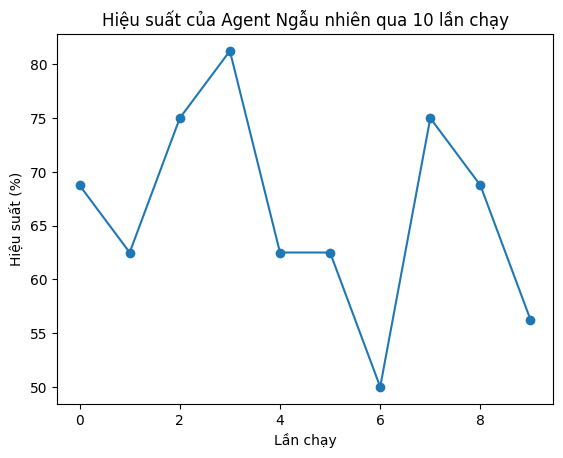

In [7]:
# Your code and description goes here
performance, actions = simple_environment(grid_size=(4, 4), dirt_prob=0.5, max_steps=30, verbose=True)
performances = []
for _ in range(10):
    perf, _ = simple_environment(grid_size=(4,4), dirt_prob=0.5, max_steps=30, verbose=False)
    performances.append(perf)

plt.plot(performances, marker='o')
plt.title("Hiệu suất của Agent Ngẫu nhiên qua 10 lần chạy")
plt.xlabel("Lần chạy")
plt.ylabel("Hiệu suất (%)")
plt.show()


## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function. Use the function signature for the `simple_randomized_agent` function above.

In [8]:
# Your code and description goes here
import random

def simple_reflex_agent(sensor_input):
    """
    Agent phản xạ đơn giản:
    - Nếu ô hiện tại bẩn => hút bụi
    - Nếu ô sạch => chọn ngẫu nhiên một hướng mà không đâm tường
    """
    current_state = sensor_input["current"]
    position = sensor_input["position"]
    grid_size = sensor_input["grid_size"]

    # Nếu ô hiện tại bẩn => hút bụi
    if current_state == 1:
        return "SUCK"

    # Nếu ô sạch => chọn hành động di chuyển hợp lệ
    possible_actions = []
    x, y = position
    rows, cols = grid_size

    if x > 0:
        possible_actions.append("UP")
    if x < rows - 1:
        possible_actions.append("DOWN")
    if y > 0:
        possible_actions.append("LEFT")
    if y < cols - 1:
        possible_actions.append("RIGHT")

    return random.choice(possible_actions)


Show how the agent works with your environment.

In [9]:
# Your code and description goes here
performance, actions = simple_environment(
    grid_size=(4, 4),
    dirt_prob=0.5,
    max_steps=30,
    verbose=True,
    agent_func=simple_reflex_agent,
    dirt_sensor_error=0.1
)
print("Final performance:", performance)
print("Remaining dirty squares:", actions)

🌍 Môi trường ban đầu:
0 0 0 0
1 1 0 1
1 1 1 0
🤖 0 1 0

Bước 1: Hành động = SUCK
0 0 0 0
1 1 0 1
1 1 1 0
🤖 0 1 0

Bước 2: Hành động = LEFT
0 0 0 0
1 1 0 1
1 1 1 0
🤖 0 1 0

Bước 3: Hành động = RIGHT
0 0 0 0
1 1 0 1
1 1 1 0
0 🤖 1 0

Bước 4: Hành động = LEFT
0 0 0 0
1 1 0 1
1 1 1 0
🤖 0 1 0

Bước 5: Hành động = RIGHT
0 0 0 0
1 1 0 1
1 1 1 0
0 🤖 1 0

Bước 6: Hành động = LEFT
0 0 0 0
1 1 0 1
1 1 1 0
🤖 0 1 0

Bước 7: Hành động = RIGHT
0 0 0 0
1 1 0 1
1 1 1 0
0 🤖 1 0

Bước 8: Hành động = RIGHT
0 0 0 0
1 1 0 1
1 1 1 0
0 0 🤖 0

Bước 9: Hành động = LEFT
0 0 0 0
1 1 0 1
1 1 1 0
0 🤖 1 0

Bước 10: Hành động = DOWN
0 0 0 0
1 1 0 1
1 1 1 0
0 🤖 1 0

Bước 11: Hành động = UP
0 0 0 0
1 1 0 1
1 🤖 1 0
0 0 1 0

Bước 12: Hành động = SUCK
0 0 0 0
1 1 0 1
1 🤖 1 0
0 0 1 0

Bước 13: Hành động = UP
0 0 0 0
1 🤖 0 1
1 0 1 0
0 0 1 0

Bước 14: Hành động = SUCK
0 0 0 0
1 🤖 0 1
1 0 1 0
0 0 1 0

Bước 15: Hành động = SUCK
0 0 0 0
1 🤖 0 1
1 0 1 0
0 0 1 0

Bước 16: Hành động = LEFT
0 0 0 0
🤖 0 0 1
1 0 1 0
0 0 1 0

Bước 17: H

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [ ]:
# Your short description of the state and your implementation goes here

In [11]:
# Your code goes here
import random

def model_based_reflex_agent(sensor_input):
    """
    Agent phản xạ dựa trên mô hình (có trí nhớ).
    Dùng biến toàn cục để lưu trạng thái giữa các bước.
    """
    # Khởi tạo state (chỉ chạy 1 lần)
    if "state" not in model_based_reflex_agent.__dict__:
        model_based_reflex_agent.state = {
            "visited": set(),
            "direction": "RIGHT"
        }

    state = model_based_reflex_agent.state
    position = sensor_input["position"]
    grid_size = sensor_input["grid_size"]
    current = sensor_input["current"]

    # 1️⃣ Nếu ô hiện tại bẩn → hút bụi
    if current == 1:
        return "SUCK"

    # 2️⃣ Đánh dấu ô đã thăm
    state["visited"].add(position)

    rows, cols = grid_size
    x, y = position

    # 3️⃣ Di chuyển theo mô hình zig-zag
    direction = state["direction"]

    if direction == "RIGHT":
        if y < cols - 1:
            return "RIGHT"
        elif x < rows - 1:
            state["direction"] = "LEFT"
            return "DOWN"

    elif direction == "LEFT":
        if y > 0:
            return "LEFT"
        elif x < rows - 1:
            state["direction"] = "RIGHT"
            return "DOWN"

    # Nếu đã đến góc cuối, không còn nơi nào đi
    return "SUCK"


Show how the agent works with your environment.

In [13]:
# Your code goes here
# Reset state trước khi chạy thử
if "state" in model_based_reflex_agent.__dict__:
    del model_based_reflex_agent.state

performance, actions = simple_environment(
    grid_size=(4, 4),
    dirt_prob=0.5,
    max_steps=50,
    verbose=True,
    agent_func=model_based_reflex_agent
)


🌍 Môi trường ban đầu:
1 0 🤖 0
1 0 1 1
1 1 1 0
1 1 0 0

Bước 1: Hành động = SUCK
1 0 🤖 0
1 0 1 1
1 1 1 0
1 1 0 0

Bước 2: Hành động = SUCK
1 0 🤖 0
1 0 1 1
1 1 1 0
1 1 0 0

Bước 3: Hành động = UP
1 0 🤖 0
1 0 1 1
1 1 1 0
1 1 0 0

Bước 4: Hành động = RIGHT
1 0 0 🤖
1 0 1 1
1 1 1 0
1 1 0 0

Bước 5: Hành động = SUCK
1 0 0 🤖
1 0 1 1
1 1 1 0
1 1 0 0

Bước 6: Hành động = DOWN
1 0 0 0
1 0 1 🤖
1 1 1 0
1 1 0 0

Bước 7: Hành động = SUCK
1 0 0 0
1 0 1 🤖
1 1 1 0
1 1 0 0

Bước 8: Hành động = RIGHT
1 0 0 0
1 0 1 🤖
1 1 1 0
1 1 0 0

Bước 9: Hành động = RIGHT
1 0 0 0
1 0 1 🤖
1 1 1 0
1 1 0 0

Bước 10: Hành động = RIGHT
1 0 0 0
1 0 1 🤖
1 1 1 0
1 1 0 0

Bước 11: Hành động = RIGHT
1 0 0 0
1 0 1 🤖
1 1 1 0
1 1 0 0

Bước 12: Hành động = RIGHT
1 0 0 0
1 0 1 🤖
1 1 1 0
1 1 0 0

Bước 13: Hành động = DOWN
1 0 0 0
1 0 1 0
1 1 1 🤖
1 1 0 0

Bước 14: Hành động = LEFT
1 0 0 0
1 0 1 0
1 1 🤖 0
1 1 0 0

Bước 15: Hành động = UP
1 0 0 0
1 0 🤖 0
1 1 1 0
1 1 0 0

Bước 16: Hành động = LEFT
1 0 0 0
1 🤖 1 0
1 1 1 0
1 1 0 0

Bước 17:

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. Do at least $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [14]:
# Your code goes here
import numpy as np

def evaluate_agent(agent_func, grid_size=(5, 5), dirt_prob=0.5, runs=100, max_steps=1000):
    """
    Chạy mô phỏng nhiều lần và tính hiệu suất trung bình.
    """
    results = []
    for _ in range(runs):
        performance, _ = simple_environment(
            grid_size=grid_size,
            dirt_prob=dirt_prob,
            max_steps=max_steps,
            verbose=False,
            agent_func=agent_func
        )
        results.append(performance)
    return np.mean(results)
sizes = [(5, 5), (10, 10), (100, 100)]
agents = {
    "Randomized Agent": simple_randomized_agent,
    "Simple Reflex Agent": simple_reflex_agent,
    "Model-based Reflex Agent": model_based_reflex_agent
}

results = {}

for size in sizes:
    print(f"Running simulations for grid {size}...")
    size_key = f"{size[0]}x{size[1]}"
    results[size_key] = {}
    for agent_name, func in agents.items():
        avg_perf = evaluate_agent(func, grid_size=size, dirt_prob=0.5, runs=100, max_steps=5000)
        results[size_key][agent_name] = avg_perf


Running simulations for grid (5, 5)...
✅ Mô phỏng hoàn tất sau 501 bước
🏆 Hiệu suất: 100.00% số ô được làm sạch
⚙️ Số hành động đã thực hiện: 501
✅ Mô phỏng hoàn tất sau 476 bước
🏆 Hiệu suất: 100.00% số ô được làm sạch
⚙️ Số hành động đã thực hiện: 476
✅ Mô phỏng hoàn tất sau 475 bước
🏆 Hiệu suất: 100.00% số ô được làm sạch
⚙️ Số hành động đã thực hiện: 475
✅ Mô phỏng hoàn tất sau 661 bước
🏆 Hiệu suất: 100.00% số ô được làm sạch
⚙️ Số hành động đã thực hiện: 661
✅ Mô phỏng hoàn tất sau 667 bước
🏆 Hiệu suất: 100.00% số ô được làm sạch
⚙️ Số hành động đã thực hiện: 667
✅ Mô phỏng hoàn tất sau 410 bước
🏆 Hiệu suất: 100.00% số ô được làm sạch
⚙️ Số hành động đã thực hiện: 410
✅ Mô phỏng hoàn tất sau 429 bước
🏆 Hiệu suất: 100.00% số ô được làm sạch
⚙️ Số hành động đã thực hiện: 429
✅ Mô phỏng hoàn tất sau 713 bước
🏆 Hiệu suất: 100.00% số ô được làm sạch
⚙️ Số hành động đã thực hiện: 713
✅ Mô phỏng hoàn tất sau 670 bước
🏆 Hiệu suất: 100.00% số ô được làm sạch
⚙️ Số hành động đã thực hiện: 67

Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | | | |
| 10x10   | | | |
| 100x100 | | | |

Add charts to compare the performance of the different agents.

In [15]:
# Your graphs and discussion of the results goes here
import pandas as pd

df_results = pd.DataFrame(results).T
df_results.index.name = "Size"
df_results


,Randomized Agent,Simple Reflex Agent,Model-based Reflex Agent
Size,,,
5x5,100.0000,100.0000,100.0000
10x10,99.8400,99.8200,99.8100
100x100,52.5428,52.5764,52.6356


## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.

1. **Rectangular room with unknown size**
* **Randomized Agent:**

  Sẽ vẫn hoạt động nhưng hiệu suất giảm mạnh, vì agent chỉ di chuyển ngẫu nhiên mà không biết được giới hạn. Nó có thể lặp lại các vùng đã sạch hoặc va vào tường nhiều lần.
* **Simple Reflex Agent:**

  Có thể hoạt động trong môi trường chữ nhật miễn là cảm biến va chạm hoạt động đúng. Tuy nhiên, vì agent không “nhớ” các ô đã đi qua nên vẫn có khả năng bỏ sót vùng chưa làm sạch.
* **Model-based Reflex Agent:**

  Là lựa chọn tốt nhất. Agent có thể tự cập nhật bản đồ môi trường trong bộ nhớ khi di chuyển và dần khám phá toàn bộ căn phòng, kể cả khi không biết kích thước trước. Nó có thể phát hiện biên giới và tránh lặp lại các vị trí đã ghé qua.
2. **Irregular shaped area (e.g., hallway connecting two rooms)**

* **Randomized Agent:**

  Gặp khó khăn lớn vì không có chiến lược điều hướng. Có thể bị mắc kẹt ở một vùng hoặc di chuyển vô định, bỏ sót khu vực kết nối.
* **Simple Reflex Agent:**

  Cảm biến va chạm sẽ giúp nó không đâm tường, nhưng agent không có khả năng “nhớ” nên dễ bị lặp lại trong hành lang hoặc quay vòng tại ngã rẽ.
* **Model-based Reflex Agent:**

  Có thể xây dựng bản đồ các ô khả dụng và mở rộng việc làm sạch theo chiến lược “tìm kiếm có hướng”. Do đó, nó sẽ dần khám phá cả hai khu vực được nối bởi hành lang.
3.  **Room with obstacles**
* **Randomized Agent:**

  Có thể phát hiện chướng ngại vật nhờ bumper sensor, nhưng vẫn sẽ va phải nhiều lần vì không có trí nhớ. Hiệu suất thấp.
* **Simple Reflex Agent:**

  Sẽ tránh được tường và chướng ngại vật nếu cảm biến chính xác. Tuy nhiên, có thể bị mắc kẹt trong vùng kín vì không có khả năng ghi nhớ đường đi hoặc tìm lối khác.
* **Model-based Reflex Agent:**

  Có khả năng cập nhật bản đồ chướng ngại vật trong bộ nhớ, từ đó tìm đường vòng để tiếp cận các vùng chưa được làm sạch. Rất phù hợp trong môi trường phức tạp có vật cản.
4.   **Dirt sensor is not perfect (10% error rate)**
* **Randomized Agent:**
  Không bị ảnh hưởng nhiều — vì hành vi vốn đã ngẫu nhiên, nhưng sẽ lãng phí bước khi “hút” ở ô sạch hoặc bỏ sót ô bẩn.
* **Simple Reflex Agent:**
  Bị ảnh hưởng đáng kể — nếu cảm biến sai, agent sẽ bỏ sót rác hoặc hút nhầm ô sạch, làm giảm hiệu suất tổng thể.
* **Model-based Reflex Agent:**
  Có thể giảm ảnh hưởng bằng cách kiểm tra lại cảm biến nhiều lần hoặc lưu trạng thái đã quan sát trước đó (nếu trước đây ô được báo bẩn thì vẫn hút dù cảm biến hiện tại báo sạch). Do đó, đây là agent chịu lỗi tốt nhất.
5. **Bumper sensor is not perfect (10% error rate)**
* **Randomized Agent:**
  Dễ đâm tường vì không nhận diện được va chạm trong 10% trường hợp. Không có trí nhớ nên có thể kẹt liên tục.
* **Simple Reflex Agent:**
 Cũng dễ đâm vào tường hoặc chướng ngại vật, và vì không có khả năng “học” nên không thể sửa lỗi cảm biến.
* **Model-based Reflex Agent:**
  Có thể phát hiện sai lệch bằng cách đối chiếu thông tin cảm biến với bản đồ trạng thái: nếu ô được cho là tường nhưng agent vẫn di chuyển được, nó sẽ cập nhật lại thông tin. Nhờ đó, model-based agent vẫn hoạt động ổn định hơn trong môi trường có cảm biến không hoàn hảo.










## Advanced task: Imperfect Dirt Sensor

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment to run experiments for the following problem: The dirt sensor has a 10% chance of giving the wrong reading. Perform experiments to observe how this changes the performance of the three implementations. Your model-based reflex agent is likely not able to clean the whole room, so you need to measure performance differently as a tradeoff between energy cost and number of uncleaned squares.

2. Design an implement a solution for your model-based agent that will clean better. Show the improvement with experiments.

In [ ]:
# Your code and discussion goes here

## More Advanced Implementation (not for credit)

If the assignment was to easy for yuo then you can think about the following problems. These problems are challenging and not part of this assignment. We will learn implementation strategies and algorithms useful for these tasks during the rest of the semester.

* __Obstacles:__ Change your simulation environment to run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Perform experiments to observe how this changes the performance of the three implementations. Describe what would need to be done to perform better with obstacles. Add code if you can.

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Your ideas/code